In [140]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [103]:
auto = pd.read_csv("Auto.csv")

In [97]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [136]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [109]:
# change type of horsepower to integer
# auto['horsepower'] = auto['horsepower'].astype(str)
auto = auto.drop(auto.index[[32,125,327,330,344]])
auto['horsepower'] = pd.to_numeric(auto['horsepower'])

In [111]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 396
Data columns (total 9 columns):
mpg             382 non-null float64
cylinders       382 non-null int64
displacement    382 non-null float64
horsepower      382 non-null int64
weight          382 non-null int64
acceleration    382 non-null float64
year            382 non-null int64
origin          382 non-null int64
name            382 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 29.8+ KB


In [110]:
for i in range(6):
    min_value = np.min(auto.iloc[:,i])
    max_value = np.max(auto.iloc[:,i])
    print ( "The range of {} is {} to {}".format(auto.columns[i],min_value,max_value))

The range of mpg is 9.0 to 46.6
The range of cylinders is 3 to 8
The range of displacement is 68.0 to 455.0
The range of horsepower is 46 to 230
The range of weight is 1613 to 5140
The range of acceleration is 8.0 to 24.8


#### mpg, cylinders, displacement, horsepower, weight, acceleration are quantative, origin, year, and name are qualitative.

In [131]:
# sns.heatmap(auto.isnull(),yticklabels=False,cbar=False,cmap='viridis')
auto.iloc[:,0:6].mean(axis=0)

mpg               23.463089
cylinders          5.479058
displacement     194.527487
horsepower       104.732984
weight          2980.000000
acceleration      15.548168
dtype: float64

In [130]:
auto.iloc[:,0:6].std(axis=0)

mpg               7.842065
cylinders         1.720139
displacement    105.640801
horsepower       38.865160
weight          857.784955
acceleration      2.779657
dtype: float64

In [125]:
auto_sub = auto.drop(auto.index[10:85])

In [126]:
for i in range(6):
    min_value = np.min(auto_sub.iloc[:,i])
    max_value = np.max(auto_sub.iloc[:,i])
    print ( "The range of {} is {} to {}".format(auto_sub.columns[i],min_value,max_value))

The range of mpg is 11.0 to 46.6
The range of cylinders is 3 to 8
The range of displacement is 68.0 to 455.0
The range of horsepower is 46 to 230
The range of weight is 1649 to 4997
The range of acceleration is 8.5 to 24.8


In [127]:
auto_sub.iloc[:,0:6].mean(axis=0)

mpg               24.475244
cylinders          5.361564
displacement     186.778502
horsepower       100.602606
weight          2931.560261
acceleration      15.743974
dtype: float64

In [128]:
auto_sub.iloc[:,0:6].std(axis=0)

mpg               7.863732
cylinders         1.649784
displacement    100.362300
horsepower       36.088377
weight          815.530718
acceleration      2.726448
dtype: float64

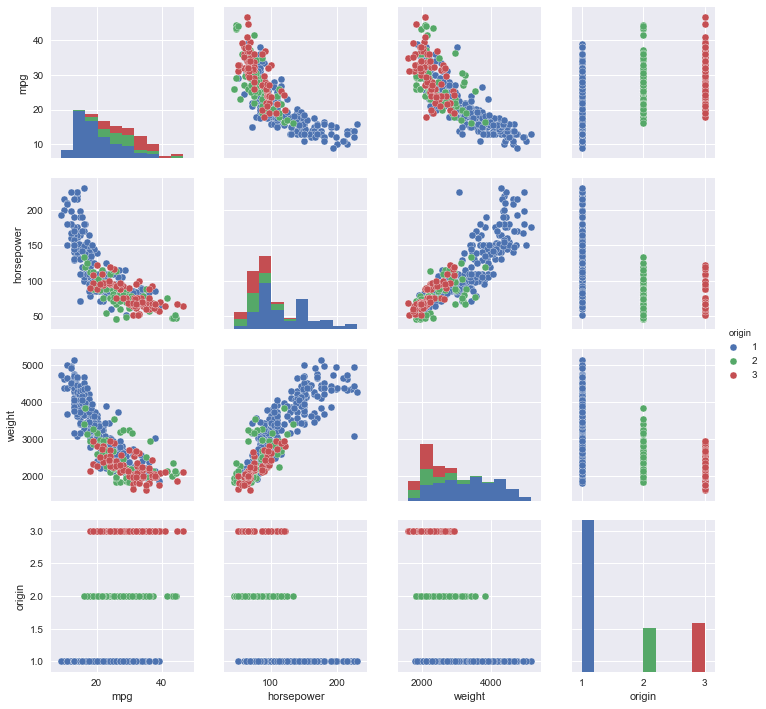

In [146]:
g = sns.pairplot(auto[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")

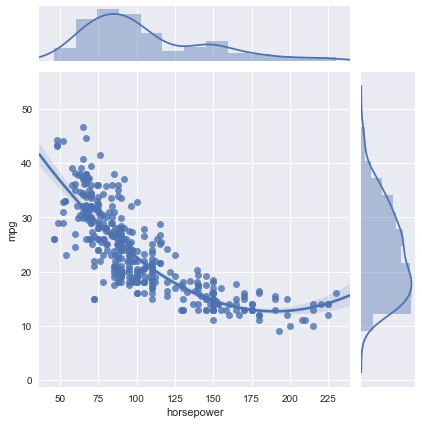

In [147]:
g = sns.JointGrid(x="horsepower", y="mpg", data=auto) 
g.plot_joint(sns.regplot, order=2) 
g.plot_marginals(sns.distplot)

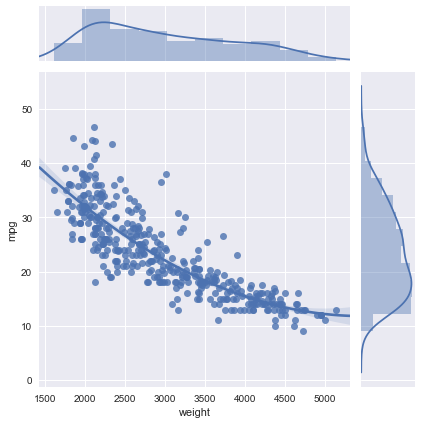

In [152]:
g = sns.JointGrid(x="weight", y="mpg", data=auto) 
g.plot_joint(sns.regplot, order=2) 
g.plot_marginals(sns.distplot)

(0, 60)

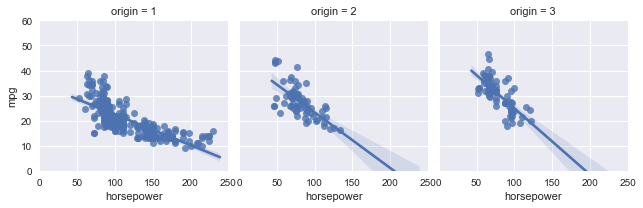

In [149]:
g = sns.FacetGrid(auto, col="origin") 
g.map(sns.regplot, "horsepower", "mpg") 
plt.xlim(0, 250) 
plt.ylim(0, 60)

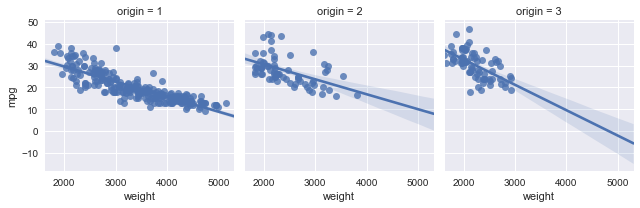

In [151]:
g = sns.FacetGrid(auto, col="origin") 
g.map(sns.regplot, "weight", "mpg") 

* Above plots show that both horsepower and weight are negative correlated with mpg, but the slope for horsepower is steeper than weight, which implies horsepower has a more significant influence on mpg. 
* Besides, the origin type, especially for type 3, also has an impact on the value of mpg. From above two plots, we could clearly notice that the difference of horsepower or weight of origin 3 has larger effect on the value of mpg.